# Simple model for MACCS

交叉验证集平均准确率: 0.7243667679837893 - 测试集准确率: 0.7102272727272727


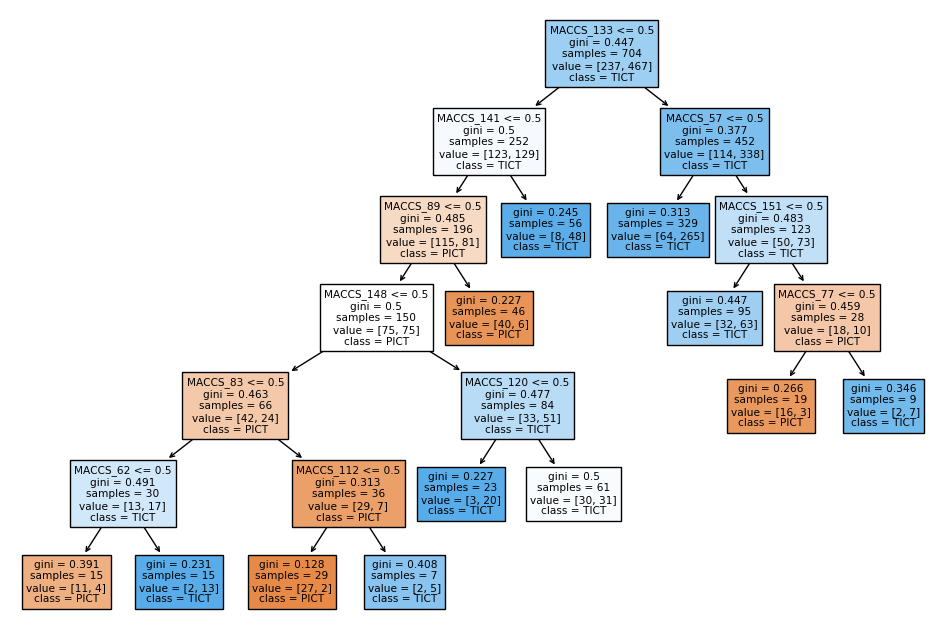


剪枝后决策树模型的分类报告:
              precision    recall  f1-score   support

           0       0.76      0.36      0.49        69
           1       0.69      0.93      0.79       107

    accuracy                           0.70       176
   macro avg       0.72      0.64      0.64       176
weighted avg       0.72      0.70      0.67       176



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

file_path = r'../dataset/Simple-MACCS.csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['SMILES', 'Label'])
y = data['Label']

param_grid = {
    'max_depth': [4],
    'min_samples_split': [30],
    'min_samples_leaf': [20],
    'criterion': ['gini']
}

random_state = 54

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=0)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
cv_results = grid_search.cv_results_
cv_accuracy = cv_results['mean_test_score'].mean()

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"交叉验证集平均准确率: {cv_accuracy} - 测试集准确率: {test_accuracy}")

path = best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  
impurities = path.impurities  

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

for i, clf in enumerate(clfs):
    if clf.tree_.node_count == 20:
        final_model = clf
        best_ccp_alpha = ccp_alphas[i]
        break
else:
    node_counts = [clf.tree_.node_count for clf in clfs]
    closest_index = np.argmin([abs(count - 20) for count in node_counts])
    final_model = clfs[closest_index]
    best_ccp_alpha = ccp_alphas[closest_index]

plt.figure(figsize=(12, 8))
plot_tree(final_model, feature_names=X.columns, class_names=['PICT', 'TICT'], filled=True)
plt.show()

y_pred = final_model.predict(X_test)
print("\n剪枝后决策树模型的分类报告:")
print(classification_report(y_test, y_pred))

# Simple model for descriptor

Fitting 5 folds for each of 1 candidates, totalling 5 fits
交叉验证集平均准确率: 0.6463768115942029 - 测试集准确率: 0.6473988439306358


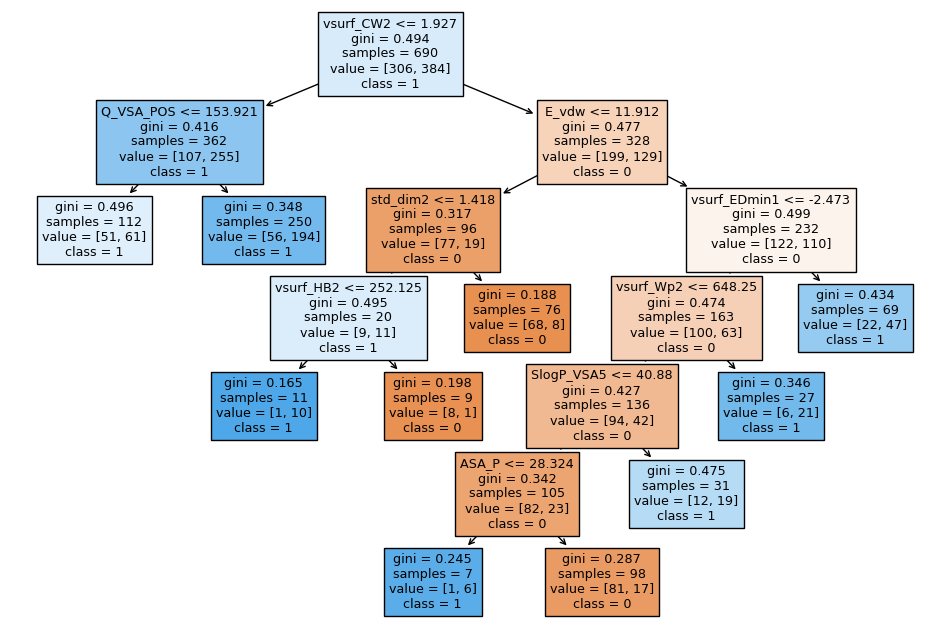


剪枝后决策树模型的分类报告:
              precision    recall  f1-score   support

           0       0.70      0.45      0.55        78
           1       0.65      0.84      0.73        95

    accuracy                           0.66       173
   macro avg       0.68      0.65      0.64       173
weighted avg       0.67      0.66      0.65       173



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

file_path = r'../dataset/Simple-descriptor.csv'  
data = pd.read_csv(file_path)

X = data.drop(columns=['True Label'])
y = data['True Label']

param_grid = {
    'max_depth': [ 5   ], 
    'min_samples_split': [ 30],  
    'min_samples_leaf': [  20],  
    'criterion': ['gini'],  
    
}


random_state = 44


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


model = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
cv_results = grid_search.cv_results_
cv_accuracy = cv_results['mean_test_score'].mean()


y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)


print(f"交叉验证集平均准确率: {cv_accuracy} - 测试集准确率: {test_accuracy}")


path = best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  
impurities = path.impurities  


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


for i, clf in enumerate(clfs):
    if clf.tree_.node_count == 20:
        final_model = clf
        best_ccp_alpha = ccp_alphas[i]
        break
else:
    
    node_counts = [clf.tree_.node_count for clf in clfs]
    closest_index = np.argmin([abs(count - 30) for count in node_counts])
    final_model = clfs[closest_index]
    best_ccp_alpha = ccp_alphas[closest_index]




plt.figure(figsize=(12, 8))
plot_tree( final_model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.show()


y_pred = final_model.predict(X_test)
print("\n剪枝后决策树模型的分类报告:")
print(classification_report(y_test, y_pred))